**About Dataset**

***Context***

The story behind this datasets is how lock-down affects employment opportunities and how the unemployment rate increases during the Covid-19.

***Content***

This dataset contains the unemployment rate of all the states in India

Region = states in India

Date = date which the unemployment rate observed

Frequency = measuring frequency (Monthly)

Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India

Estimated Employed = percentage of people employed
*italicized text*
Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the
total number of people eligible to participate in the labor force

In [1]:
#importing libraries

#for data cleaning
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Unemployment in India.csv')

data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
#to clear additional spaces in the columns

data.columns = data.columns.str.strip()

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,1.178795e+01,1.072130e+01,0.00,4.657500e+00,8.35,1.588750e+01,76.74
Estimated Employed,740.0,7.204460e+06,8.087988e+06,49420.00,1.190404e+06,4744178.50,1.127549e+07,45777509.00
Estimated Labour Participation Rate (%),740.0,4.263012e+01,8.111094e+00,13.33,3.806250e+01,41.16,4.550500e+01,72.57


In [6]:
#checking for null values
data.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [7]:
#remove unwanted space before column names
data.columns=data.columns.str.strip()
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [8]:
#currently date column in object type so let's convert it into datetime type
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
import datetime as dt

In [10]:
data = data.rename(columns={'Region':'States', 'Region.1':'Region'})

data.head()

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [11]:
#dropping rows with null values
data=data.dropna()

In [12]:
#final shape of the dataset
data.shape

(740, 7)

Data Visualization

<Axes: >

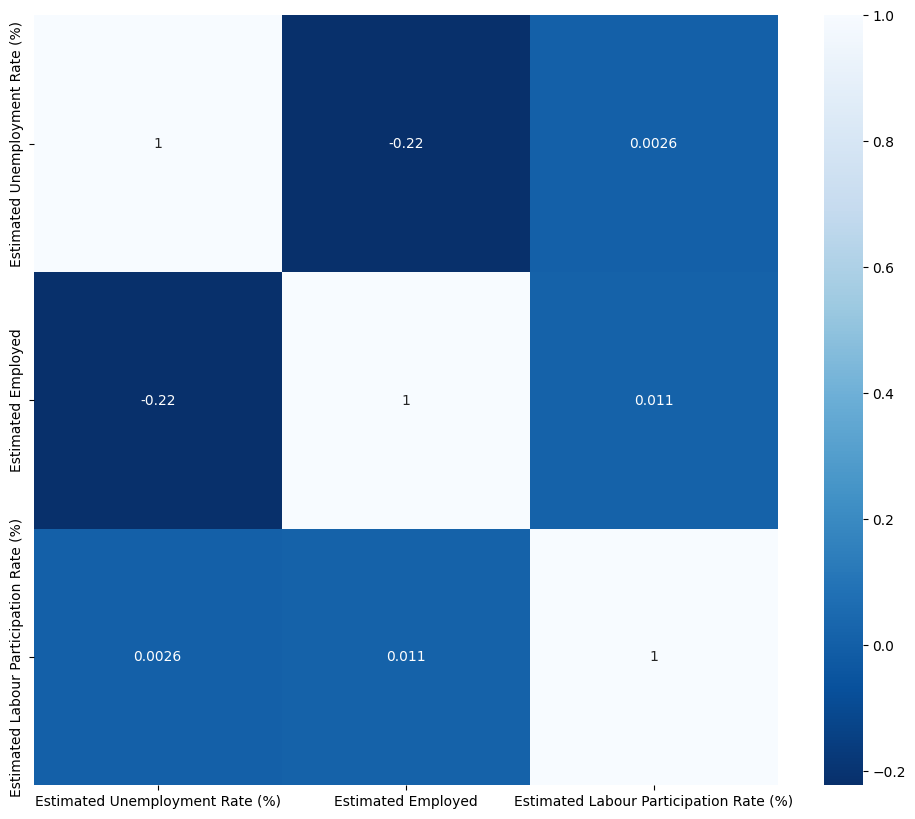

In [13]:
#coorelation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues_r')

In [14]:
count_by_area=data['Area'].value_counts().rename_axis('Area').reset_index(name='Count')
count_by_area.sort_values(by='Count',ascending=False)

,Area,Count
0,Urban,381
1,Rural,359


<Axes: xlabel='Area', ylabel='count'>

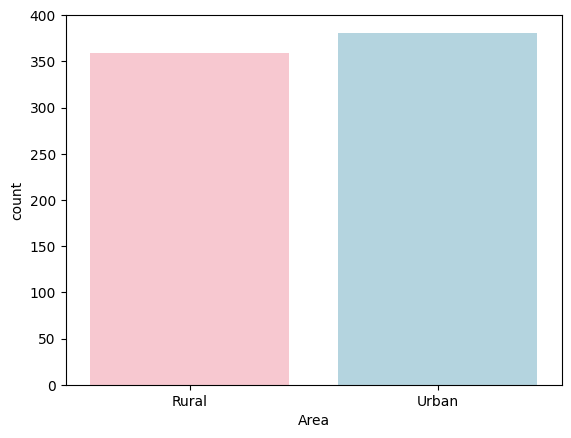

In [15]:
sns.countplot(x='Area',data=data,palette=['pink','lightblue'])

In [16]:
data['States'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: States, dtype: int64

In [18]:
data['States'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: States, dtype: int64

In [19]:
count_by_region=data['States'].value_counts().rename_axis('State').reset_index(name='Count')
count_by_region.style.background_gradient(cmap='Blues')

,State,Count
0,Andhra Pradesh,28
1,Kerala,28
2,West Bengal,28
3,Uttar Pradesh,28
4,Tripura,28
5,Telangana,28
6,Tamil Nadu,28
7,Rajasthan,28
8,Punjab,28
9,Odisha,28


<Axes: xlabel='count', ylabel='States'>

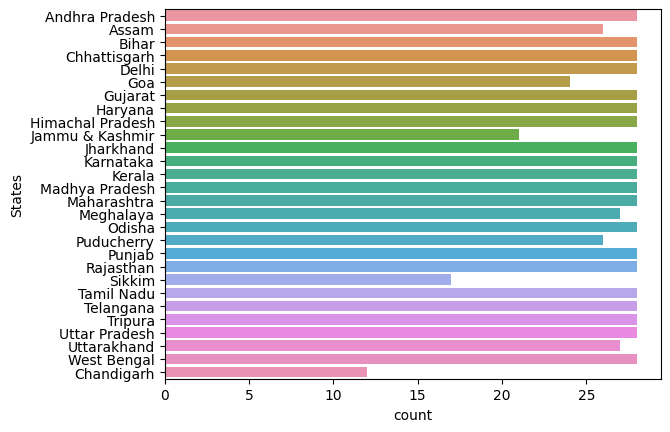

In [20]:
sns.countplot(y='States',data=data)

<Axes: title={'center': 'Unemployment Rate based on Area'}, xlabel='Estimated Unemployment Rate (%)', ylabel='States'>

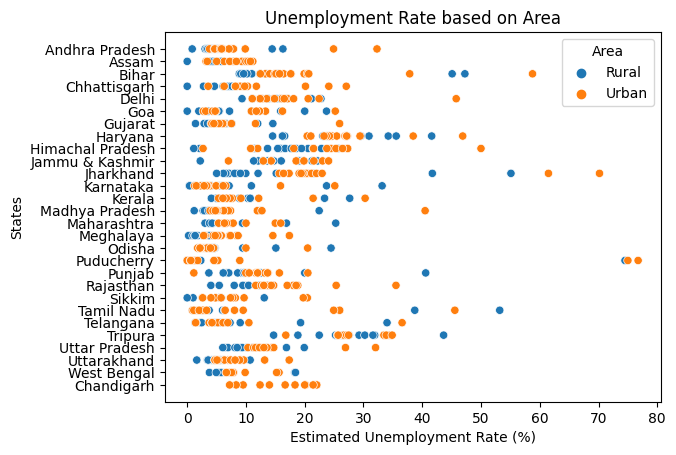

In [21]:
plt.title('Unemployment Rate based on Area')
sns.scatterplot(y=data['States'],x=data['Estimated Unemployment Rate (%)'],hue=data['Area'])

In [22]:
#States with High Unemployment Rate
data[data['Estimated Unemployment Rate (%)']>50].States.value_counts()

Jharkhand     3
Puducherry    3
Tamil Nadu    1
Bihar         1
Name: States, dtype: int64

<Axes: title={'center': 'States with High Unemployment Rate'}, xlabel='Estimated Unemployment Rate (%)', ylabel='States'>

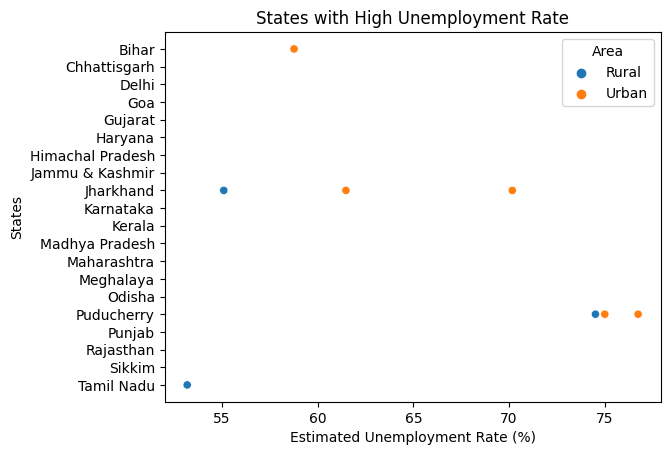

In [23]:
plt.title('States with High Unemployment Rate')
df=data[data['Estimated Unemployment Rate (%)']>50]
sns.scatterplot(y=data['States'],x=df['Estimated Unemployment Rate (%)'],hue=data['Area'])

In [24]:
#  Unemployment Rate by area
data[data['Estimated Unemployment Rate (%)']>40].Area.value_counts()

Urban    10
Rural     9
Name: Area, dtype: int64

In [26]:
#states based on employed
data[data['Estimated Employed']>7500000].States.value_counts()

Maharashtra       28
Uttar Pradesh     28
West Bengal       28
Karnataka         27
Gujarat           26
Tamil Nadu        24
Andhra Pradesh    14
Bihar             14
Madhya Pradesh    14
Rajasthan         14
Telangana         14
Odisha            13
Assam             12
Jharkhand          4
Name: States, dtype: int64

<Axes: xlabel='States', ylabel='count'>

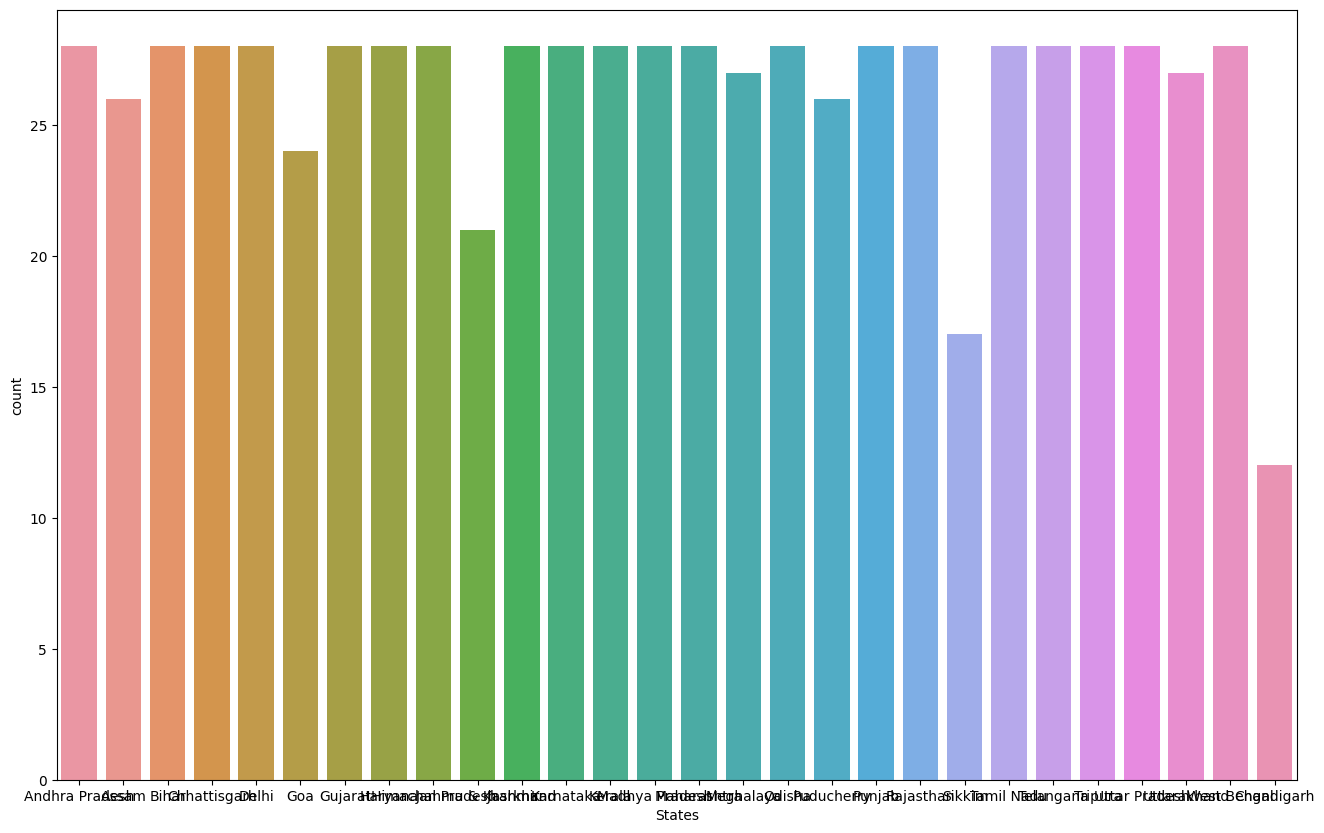

In [30]:
plt.figure(figsize=(16, 10))
sns.countplot(data=data, x='States')

<Axes: xlabel='Estimated Unemployment Rate (%)', ylabel='States'>

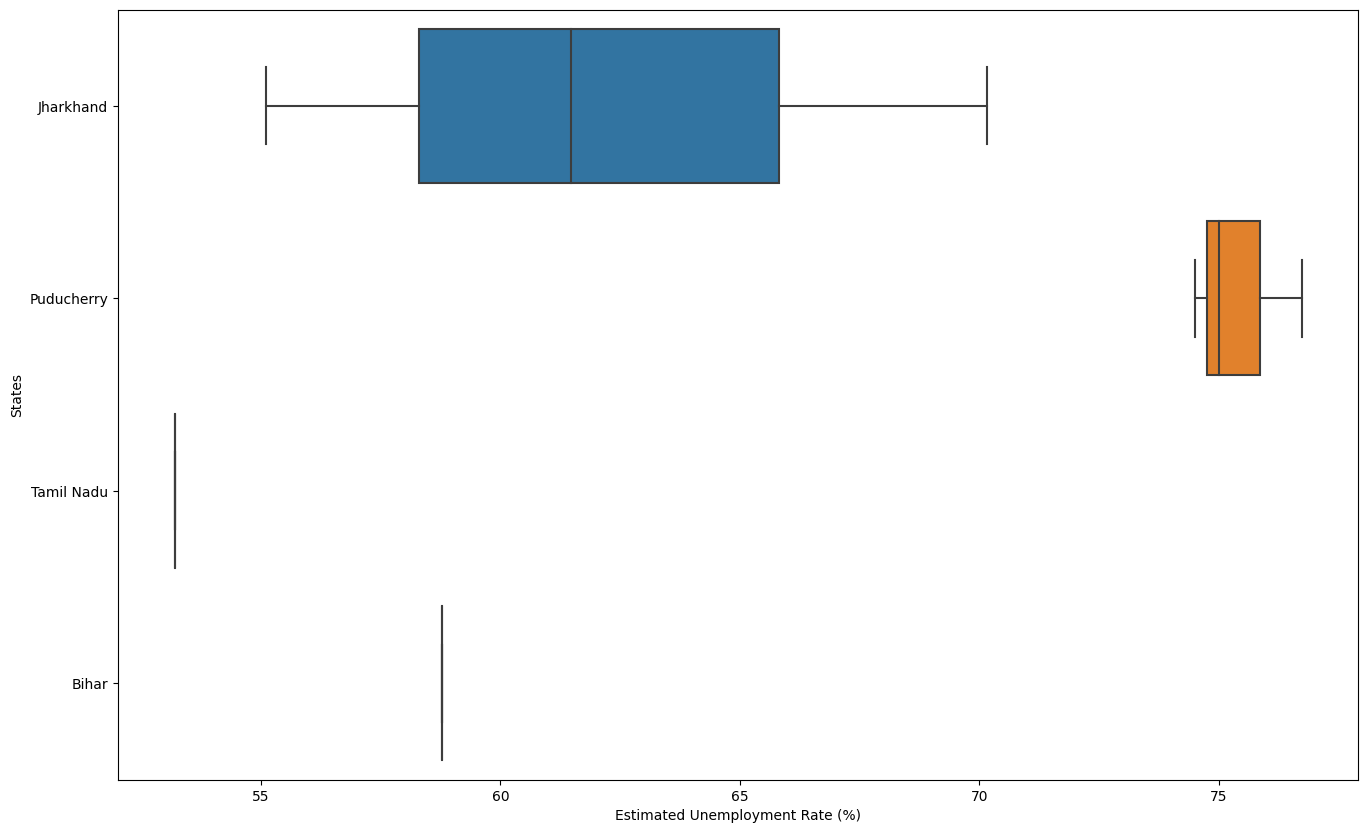

In [31]:
#Check unemployment rate in each state

plt.figure(figsize=(16, 10))
sns.boxplot(data=df, y='States', x='Estimated Unemployment Rate (%)')

In [36]:
#Check average unemployment rate in each state

aur_df = df[['States', 'Estimated Unemployment Rate (%)']].groupby('States').mean().reset_index()
aur_df = aur_df.sort_values(by='Estimated Unemployment Rate (%)', ascending=False)

aur_df.head()

,States,Estimated Unemployment Rate (%)
2,Puducherry,75.416667
1,Jharkhand,62.250000
0,Bihar,58.770000
3,Tamil Nadu,53.190000


<Axes: xlabel='Estimated Unemployment Rate (%)', ylabel='States'>

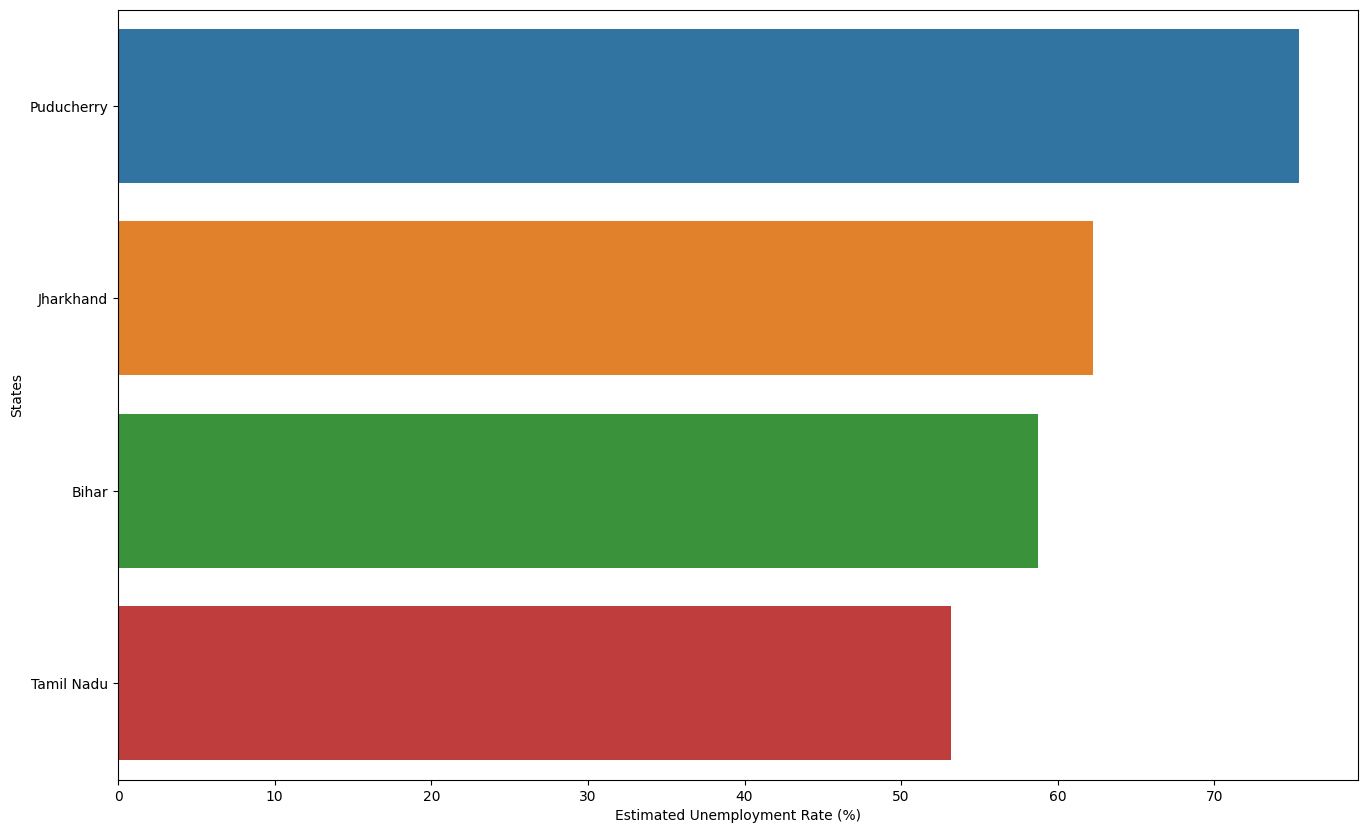

In [37]:
plt.figure(figsize=(16, 10))
sns.barplot(data=aur_df, y='States', x='Estimated Unemployment Rate (%)')

In [42]:
def sort_impact_level(x):
    if x > 20:
        return 'hardest impacted states'
    elif x > 10:
        return 'harder impacted states'
    elif x > 5:
        return 'hard impacted states'
    elif x > 0:
        return 'impacted states'
    else:
        return 'not impacted states'